#Расчет потока частиц в детекторе

Рассматривается простейший случай, когда плазма не движется относительно спутника (присутствует лишь хаотическое движение частиц).

Задача:
* Посчитать значения ионного потока для ионов водорода (протонов) при T=5 000⸰K, угла раствора коллиматора α=10⸰, скоростей ионов от 2 до 5 км в сек. Значения k и m взять из справочников. n положить равной единице.

In [2]:
import numpy as np

###Распределение Максвелла (по скоростям)

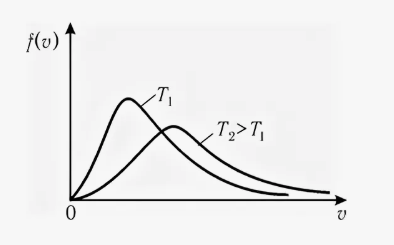

Функция распределения Максвелла по модулю скорости

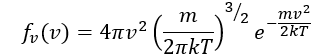

Здесь v – «микроскорость» частиц, m – масса иона, k – постоянная Больцмана, T – температура в К.

Выражение для потока частиц

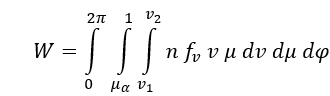

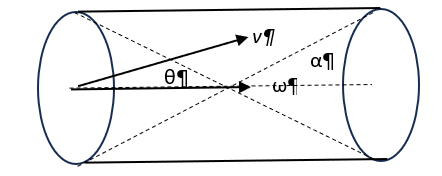

Здесь v – «микроскорость» частиц, ω – направление оси коллиматора, θ – угол между скоростью и осью коллиматора, α – угол раствора коллиматора.

###Константы

In [3]:
k = 1.38e-23
m = 1.67e-27

In [4]:
T = 5000
alpha = np.deg2rad(10)
v1 = 2000
v2 = 5000
n = 1

In [5]:
mu_alpha = np.cos(alpha)

###Функция распределения Максвелла

In [6]:
def maxwell_distribution(v):
  const = 4 * np.pi * (m / (2 * np.pi * k * T))**1.5

  f = v**2 * const * np.exp(-m * v**2 / (2 * k * T))

  return f

In [8]:
def maxwell_integrand(v, mu):
    return n * maxwell_distribution(v) * v * mu

###Метод Симпсона

In [16]:
def simpson_method(f, a, b, n):
    if n % 2 != 0:
        n += 1

    h = (b - a) / n

    integral = f(a) + f(b)

    for i in range(1, n):
        x_i = a + i * h

        if i % 2 == 0:
            integral += 2 * f(x_i)
        else:
            integral += 4 * f(x_i)

    return integral * h / 3

###Расчёт значения ионного потока

In [17]:
def calculate_ion_flow():
    num_intervals_v = 1000
    num_intervals_mu = 1000

    # Интегрирование от v1 до v2
    flow_v = simpson_method(lambda v: maxwell_integrand(v, 1), v1, v2, num_intervals_v)

    # Интегрирование от mu_alpha до 1
    flow_mu = simpson_method(lambda mu: flow_v, mu_alpha, 1, num_intervals_mu)

    # Интегрирование от 0 до 2pi
    ion_flow = 2 * np.pi * flow_mu

    return ion_flow

In [18]:
print(f"Ионный поток: {calculate_ion_flow()}")

Ионный поток: 35.60805566526315
